The current step of update is:  0
The current step of update is:  10000
The current step of update is:  20000
The current step of update is:  30000
The current step of update is:  40000
The current step of update is:  50000


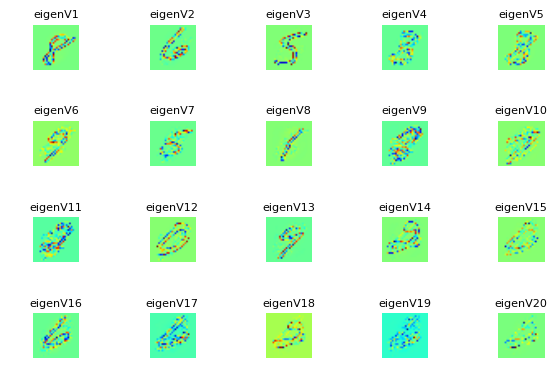

In [2]:
import numpy as np
import struct
from scipy.misc import imsave
import matplotlib.pyplot as plt

class CCIPCA(object):    
    def __init__(self, inputDim, outputDim):
        self._input_dim = inputDim
        self._output_dim = outputDim
        self._n = 1
        self._mean = 0.1 * np.random.randn(1, self._input_dim)
        self._eigenVectors = 0.1 * np.random.randn(self._output_dim, self._input_dim)
        
    def _amnestic(self, t):               # amnestic function
        [n1, n2, a, C] = [20., 200., 2000., 2.]
        if t < n1:
            alpha = 0
        elif (t >= n1) and (t < n2):
            alpha = C * (t - n1) / (n2 - n1)
        else:
            alpha = C + (t - n2) / a
            
        n = t
        _lr = float(n - alpha - 1) / n  # learning rate
        _rr = float(alpha + 1) / n      # residual rate
        
        return [_rr, _lr]
    
    def update(self, x):
        assert(x.shape[0] == 1)           
        
        # compute the mean imcrementally
        self._mean = float(self._n - 1) / self._n * self._mean + float(1) / self._n * x
        
        if self._n > 1:
            u = x - self._mean                 # reduce the mean vector
            [w1, w2] = self._amnestic(self._n)   # conpute the amnestic parameters
            k = min(self._n, self._output_dim)
            for i in range(k):  # update all eigenVectors
                v = self._eigenVectors[i,:].copy()  # get the current eigenVector
                if(i == k - 1):
                    v = u.copy()
                    vn = v / np.linalg.norm(v) # normalize the vector
                else:                    
                    v = w1 * v + w2 * np.dot(u, v.T)/ np.linalg.norm(v) * u # update the eigenVector
                    vn = v / np.linalg.norm(v) # normalize the vector

                u = u -  np.dot(u, vn.T) * vn # remove the projection of u on the v
                self._eigenVectors[i,:] = v.copy()  
                
        self._n += 1  # update the mean of the data        
        
        
ccipca = CCIPCA(784,20)
filename = 'train-images.idx3-ubyte'
binfile = open(filename , 'rb')
buf = binfile.read()

index = 0        
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)        
index += struct.calcsize('>IIII')

for i in range(numImages):  
    if(i % 10000 == 0):
        print("The current step of update is: ", i)
    im = struct.unpack_from('>784B' ,buf, index)
    index += struct.calcsize('>784B')
    im = np.array(im, dtype = np.int8)
    im = im.reshape(1, 784)
    ccipca.update(im)

# ccipca.scaleTo255()
fig = plt.figure()
for i in range(20):    
    name =  "eigenV" + str(i+1)
    im = ccipca._eigenVectors[i,:].copy()
    im = np.array(im)
    im = im.reshape(28,28)
    plt.subplot(4,5,i + 1), plt.title(name,fontsize = 8)
    plt.imshow(im), plt.axis('off')
#     plt.tight_layout()

fig.tight_layout()#调整整体空白
plt.show()   

In [5]:
for i in range(1):
    print(i)

0


In [1]:
minVal = min([1, 2, 3])
print(minVal)

1
